In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# defining exact paths
# Go up two levels from 'notebooks/modeling' to project root
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../..'))

RAW_DATA_PATH = os.path.join(BASE_DIR, 'data', 'raw', 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
PROCESSED_DATA_PATH = os.path.join(BASE_DIR, 'data', 'processed')

# creating the processed folder if it doesn't exist
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

print(f"Reading data from: {RAW_DATA_PATH}")
print(f"Saving data to: {PROCESSED_DATA_PATH}")

Reading data from: /Users/ranugi/Downloads/RAMIRU/telco-customer-churn-analysis/telco/telco-customer-churn-analysis/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv
Saving data to: /Users/ranugi/Downloads/RAMIRU/telco-customer-churn-analysis/telco/telco-customer-churn-analysis/data/processed


### LOADING DATA

In [3]:
df = pd.read_csv(RAW_DATA_PATH)

In [4]:
pd.set_option('display.max_columns', None)
display(df.head(2))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### DROP UNNECESSARY COLUMNS

In [5]:
df.drop(columns=['customerID'], inplace=True)

### FIX: TotalCharges (Coverting to numeric and imputing missing values)

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# filling NaN values with 0 safely (pandas update)

### ENCODING

In [7]:
# Target Variable (Churn) -> 1 and 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [8]:
# Categorical Features (One-Hot Encoding)
# This turns 'PaymentMethod' into 'PaymentMethod_Electronic check', etc.

# 1. columns=... -> Targets specific columns safely
# 2. drop_first=True -> prevents the dummy variable trap
# 3. dtype=int -> gives the clean 1s and 0s

categorical_cols = [c for c in df.columns if df[c].dtype == 'object']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [9]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [10]:
print(f"Shape after encoding: {df_encoded.shape}")

Shape after encoding: (7043, 31)


In [11]:
print(f"Shape before encoding: {df.shape}")

Shape before encoding: (7043, 20)


### SCALING

In [12]:
# we must squash everything between 0 and 1.

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

In [13]:
# apply the scaler ONLY to the numerical columns
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [14]:
print('\n DataFrame after performing One-hot Encoding: ')
display(df_encoded.head())


 DataFrame after performing One-hot Encoding: 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.115423,0.003437,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0.472222,0.385075,0.217564,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0.027778,0.354229,0.012453,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0.625000,0.239303,0.211951,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0.027778,0.521891,0.017462,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### SPLITTING

In [15]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Stratify ensures we keep the same churn % in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
X_train.to_csv(os.path.join(PROCESSED_DATA_PATH, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(PROCESSED_DATA_PATH, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(PROCESSED_DATA_PATH, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(PROCESSED_DATA_PATH, 'y_test.csv'), index=False)

print(f"\n[SUCCESS] Data processed and saved to {PROCESSED_DATA_PATH}")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


[SUCCESS] Data processed and saved to /Users/ranugi/Downloads/RAMIRU/telco-customer-churn-analysis/telco/telco-customer-churn-analysis/data/processed
Training Shape: (5634, 30)
Testing Shape: (1409, 30)


### VISUALIZATIONS

Feature Correlation Heatmap:

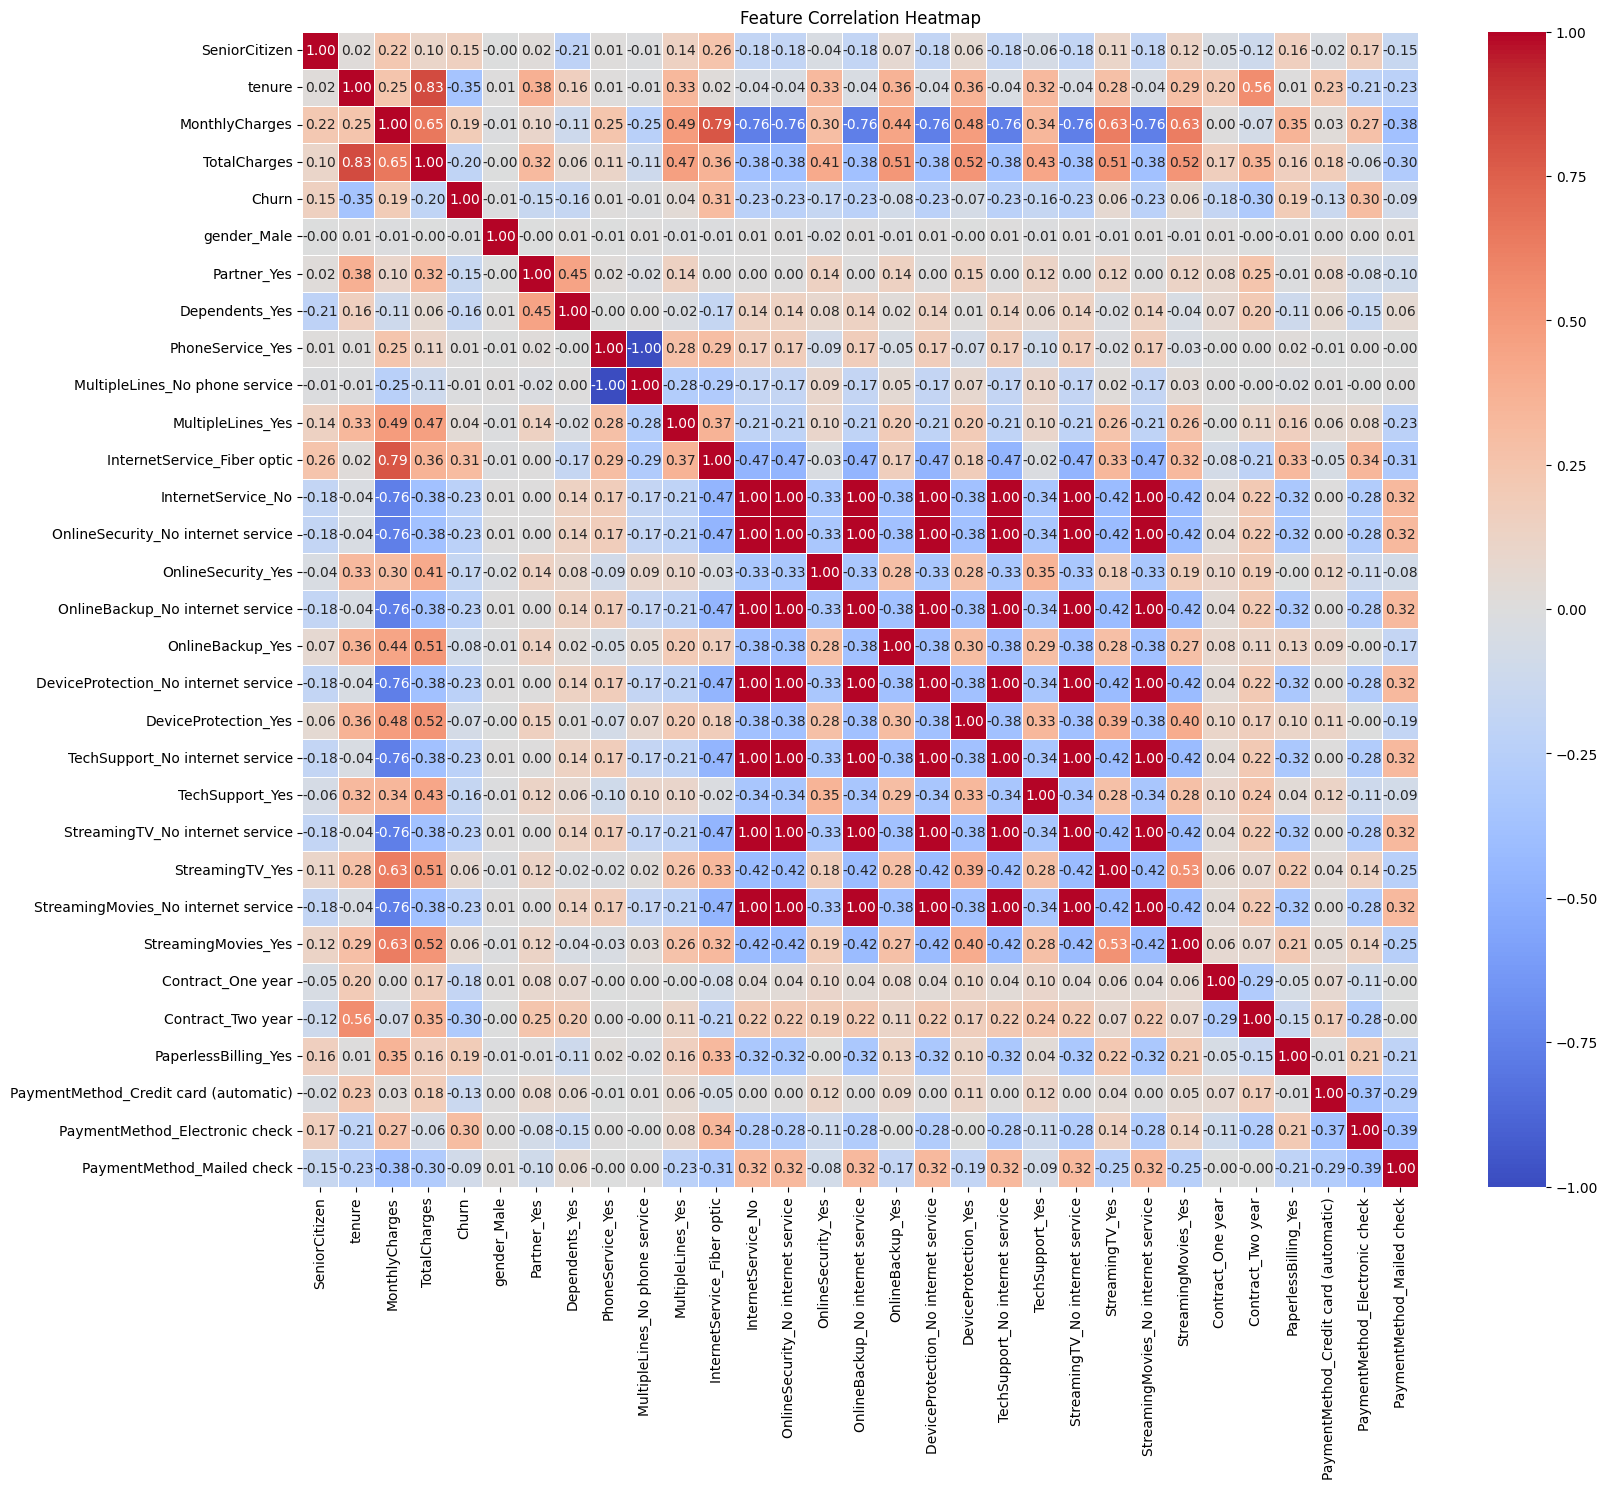

In [17]:
plt.figure(figsize=(18, 15))

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

Feature Correlation Heatmap:

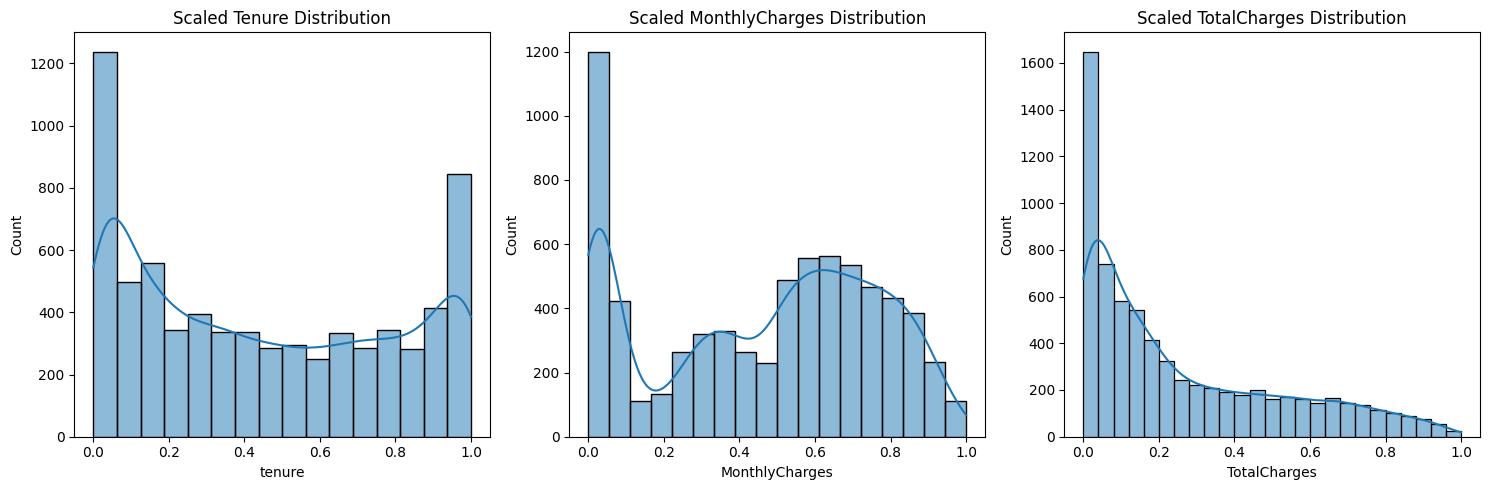

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_encoded['tenure'], kde=True, ax=axes[0])
axes[0].set_title('Scaled Tenure Distribution')

sns.histplot(df_encoded['MonthlyCharges'], kde=True, ax=axes[1])
axes[1].set_title('Scaled MonthlyCharges Distribution')

sns.histplot(df_encoded['TotalCharges'], kde=True, ax=axes[2])
axes[2].set_title('Scaled TotalCharges Distribution')

plt.tight_layout()
plt.show()